In [1]:
import numpy as np
import pandas as pd
import lightgbm as ltb
import xgboost as xgb
import time
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("train.csv")
ID = data['id']

#Drop unnecessary columns
data = data.iloc[:,1:]

In [4]:
data['log_loss'] = np.log(data['loss'])

In [5]:
seed = 7
test_size = 0.2

In [6]:
n_data = 50000

cont_X = data.iloc[0:n_data, 116:130]
cat_X = data.iloc[0:n_data, 0:116]
X = data.iloc[0:n_data, :130]

Y = data.iloc[0:n_data, 130:131]
log_Y = data.iloc[0:n_data, 131:132]

dummies_X = np.array(pd.get_dummies(cat_X))
new_X = np.c_[dummies_X, cont_X]

X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]

In [7]:
#LightGBM - optimal

start_time = time.time()

model = ltb.LGBMRegressor(colsample_bytree=0.8411367740809124, max_depth=15,
                          min_child_samples=63, min_split_gain=0.06616105626244219,
                          num_leaves=138, subsample=0.775858544114288)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
lightGBM_pred = y_pred

mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

Mean absolute error : 1182.391828849768
-- 7.67899990082 seconds --


In [8]:
#XGBoost - optimal

start_time = time.time()

model = XGBRegressor(colsample_bytree=0.7728406497964131, gamma=0.37283523367506644,
                     max_depth=7, min_child=6,reg_lambda=0.5367813176028038, subsample=0.9782004476408138)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
XGBoost_pred = y_pred


mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

Mean absolute error : 1181.0198005828856
-- 455.113000154 seconds --


In [9]:
#CatBoost

start_time = time.time()

model = CatBoostRegressor()

model.fit(X_train,y_train,eval_set=(X_test, y_test))

y_pred = model.predict(X_test)
CB_pred = y_pred

mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

Learning rate set to 0.092529
0:	learn: 0.7857059	test: 0.7921786	best: 0.7921786 (0)	total: 155ms	remaining: 2m 34s
1:	learn: 0.7635766	test: 0.7710832	best: 0.7710832 (1)	total: 194ms	remaining: 1m 36s
2:	learn: 0.7443985	test: 0.7522602	best: 0.7522602 (2)	total: 235ms	remaining: 1m 18s
3:	learn: 0.7271963	test: 0.7354231	best: 0.7354231 (3)	total: 278ms	remaining: 1m 9s
4:	learn: 0.7127784	test: 0.7215374	best: 0.7215374 (4)	total: 320ms	remaining: 1m 3s
5:	learn: 0.7001089	test: 0.7097579	best: 0.7097579 (5)	total: 364ms	remaining: 1m
6:	learn: 0.6891126	test: 0.6991510	best: 0.6991510 (6)	total: 406ms	remaining: 57.6s
7:	learn: 0.6788905	test: 0.6891270	best: 0.6891270 (7)	total: 449ms	remaining: 55.6s
8:	learn: 0.6704244	test: 0.6811710	best: 0.6811710 (8)	total: 489ms	remaining: 53.9s
9:	learn: 0.6630487	test: 0.6740160	best: 0.6740160 (9)	total: 535ms	remaining: 52.9s
10:	learn: 0.6568118	test: 0.6678445	best: 0.6678445 (10)	total: 583ms	remaining: 52.5s
11:	learn: 0.6505946	t

94:	learn: 0.5548331	test: 0.5728293	best: 0.5728293 (94)	total: 4.53s	remaining: 43.2s
95:	learn: 0.5544714	test: 0.5724491	best: 0.5724491 (95)	total: 4.59s	remaining: 43.3s
96:	learn: 0.5541982	test: 0.5722142	best: 0.5722142 (96)	total: 4.68s	remaining: 43.6s
97:	learn: 0.5539876	test: 0.5720732	best: 0.5720732 (97)	total: 4.73s	remaining: 43.5s
98:	learn: 0.5536501	test: 0.5717819	best: 0.5717819 (98)	total: 4.78s	remaining: 43.5s
99:	learn: 0.5532428	test: 0.5714950	best: 0.5714950 (99)	total: 4.84s	remaining: 43.6s
100:	learn: 0.5530400	test: 0.5713614	best: 0.5713614 (100)	total: 4.88s	remaining: 43.5s
101:	learn: 0.5529348	test: 0.5713061	best: 0.5713061 (101)	total: 4.93s	remaining: 43.4s
102:	learn: 0.5525740	test: 0.5710374	best: 0.5710374 (102)	total: 4.97s	remaining: 43.3s
103:	learn: 0.5523986	test: 0.5709077	best: 0.5709077 (103)	total: 5.02s	remaining: 43.3s
104:	learn: 0.5520628	test: 0.5706342	best: 0.5706342 (104)	total: 5.08s	remaining: 43.3s
105:	learn: 0.5517925	

189:	learn: 0.5380022	test: 0.5619774	best: 0.5619774 (189)	total: 9.28s	remaining: 39.6s
190:	learn: 0.5379205	test: 0.5619564	best: 0.5619564 (190)	total: 9.33s	remaining: 39.5s
191:	learn: 0.5377678	test: 0.5618848	best: 0.5618848 (191)	total: 9.37s	remaining: 39.4s
192:	learn: 0.5377558	test: 0.5618849	best: 0.5618848 (191)	total: 9.41s	remaining: 39.4s
193:	learn: 0.5376000	test: 0.5618188	best: 0.5618188 (193)	total: 9.45s	remaining: 39.3s
194:	learn: 0.5374274	test: 0.5617876	best: 0.5617876 (194)	total: 9.5s	remaining: 39.2s
195:	learn: 0.5372452	test: 0.5617610	best: 0.5617610 (195)	total: 9.56s	remaining: 39.2s
196:	learn: 0.5370607	test: 0.5617279	best: 0.5617279 (196)	total: 9.6s	remaining: 39.1s
197:	learn: 0.5369243	test: 0.5616323	best: 0.5616323 (197)	total: 9.65s	remaining: 39.1s
198:	learn: 0.5368107	test: 0.5615837	best: 0.5615837 (198)	total: 9.71s	remaining: 39.1s
199:	learn: 0.5365199	test: 0.5613364	best: 0.5613364 (199)	total: 9.76s	remaining: 39.1s
200:	learn: 

283:	learn: 0.5269380	test: 0.5581249	best: 0.5581249 (283)	total: 14s	remaining: 35.3s
284:	learn: 0.5269213	test: 0.5581197	best: 0.5581197 (284)	total: 14s	remaining: 35.2s
285:	learn: 0.5268367	test: 0.5581203	best: 0.5581197 (284)	total: 14.1s	remaining: 35.2s
286:	learn: 0.5268274	test: 0.5581203	best: 0.5581197 (284)	total: 14.1s	remaining: 35.1s
287:	learn: 0.5268185	test: 0.5581211	best: 0.5581197 (284)	total: 14.2s	remaining: 35s
288:	learn: 0.5267049	test: 0.5581094	best: 0.5581094 (288)	total: 14.2s	remaining: 34.9s
289:	learn: 0.5266040	test: 0.5580787	best: 0.5580787 (289)	total: 14.3s	remaining: 34.9s
290:	learn: 0.5265129	test: 0.5580756	best: 0.5580756 (290)	total: 14.3s	remaining: 34.9s
291:	learn: 0.5264273	test: 0.5580167	best: 0.5580167 (291)	total: 14.3s	remaining: 34.8s
292:	learn: 0.5262846	test: 0.5578799	best: 0.5578799 (292)	total: 14.4s	remaining: 34.7s
293:	learn: 0.5262150	test: 0.5578808	best: 0.5578799 (292)	total: 14.4s	remaining: 34.6s
294:	learn: 0.52

375:	learn: 0.5196725	test: 0.5564065	best: 0.5563988 (373)	total: 18.5s	remaining: 30.6s
376:	learn: 0.5195726	test: 0.5563673	best: 0.5563673 (376)	total: 18.5s	remaining: 30.6s
377:	learn: 0.5194811	test: 0.5563444	best: 0.5563444 (377)	total: 18.6s	remaining: 30.6s
378:	learn: 0.5194309	test: 0.5563338	best: 0.5563338 (378)	total: 18.6s	remaining: 30.5s
379:	learn: 0.5193555	test: 0.5563458	best: 0.5563338 (378)	total: 18.7s	remaining: 30.5s
380:	learn: 0.5192663	test: 0.5563334	best: 0.5563334 (380)	total: 18.7s	remaining: 30.4s
381:	learn: 0.5192082	test: 0.5562931	best: 0.5562931 (381)	total: 18.8s	remaining: 30.4s
382:	learn: 0.5191221	test: 0.5562780	best: 0.5562780 (382)	total: 18.8s	remaining: 30.3s
383:	learn: 0.5191154	test: 0.5562841	best: 0.5562780 (382)	total: 18.9s	remaining: 30.2s
384:	learn: 0.5190474	test: 0.5562854	best: 0.5562780 (382)	total: 18.9s	remaining: 30.2s
385:	learn: 0.5189663	test: 0.5562800	best: 0.5562780 (382)	total: 18.9s	remaining: 30.1s
386:	learn

467:	learn: 0.5134756	test: 0.5556126	best: 0.5555753 (464)	total: 23.5s	remaining: 26.7s
468:	learn: 0.5133914	test: 0.5556138	best: 0.5555753 (464)	total: 23.5s	remaining: 26.6s
469:	learn: 0.5133224	test: 0.5555981	best: 0.5555753 (464)	total: 23.6s	remaining: 26.6s
470:	learn: 0.5132043	test: 0.5555902	best: 0.5555753 (464)	total: 23.7s	remaining: 26.6s
471:	learn: 0.5131243	test: 0.5556010	best: 0.5555753 (464)	total: 23.7s	remaining: 26.5s
472:	learn: 0.5130322	test: 0.5555891	best: 0.5555753 (464)	total: 23.7s	remaining: 26.5s
473:	learn: 0.5129370	test: 0.5555619	best: 0.5555619 (473)	total: 23.8s	remaining: 26.4s
474:	learn: 0.5128869	test: 0.5555603	best: 0.5555603 (474)	total: 23.9s	remaining: 26.4s
475:	learn: 0.5128349	test: 0.5555703	best: 0.5555603 (474)	total: 23.9s	remaining: 26.4s
476:	learn: 0.5128038	test: 0.5555843	best: 0.5555603 (474)	total: 24s	remaining: 26.3s
477:	learn: 0.5127342	test: 0.5555693	best: 0.5555603 (474)	total: 24s	remaining: 26.3s
478:	learn: 0.

561:	learn: 0.5070633	test: 0.5548762	best: 0.5548566 (560)	total: 28.4s	remaining: 22.1s
562:	learn: 0.5069789	test: 0.5548880	best: 0.5548566 (560)	total: 28.4s	remaining: 22s
563:	learn: 0.5069136	test: 0.5548723	best: 0.5548566 (560)	total: 28.5s	remaining: 22s
564:	learn: 0.5068390	test: 0.5548916	best: 0.5548566 (560)	total: 28.5s	remaining: 22s
565:	learn: 0.5067927	test: 0.5549446	best: 0.5548566 (560)	total: 28.6s	remaining: 21.9s
566:	learn: 0.5067304	test: 0.5549536	best: 0.5548566 (560)	total: 28.6s	remaining: 21.8s
567:	learn: 0.5066617	test: 0.5549234	best: 0.5548566 (560)	total: 28.7s	remaining: 21.8s
568:	learn: 0.5066017	test: 0.5549102	best: 0.5548566 (560)	total: 28.7s	remaining: 21.8s
569:	learn: 0.5065940	test: 0.5549195	best: 0.5548566 (560)	total: 28.8s	remaining: 21.7s
570:	learn: 0.5065139	test: 0.5549342	best: 0.5548566 (560)	total: 28.8s	remaining: 21.7s
571:	learn: 0.5064310	test: 0.5549263	best: 0.5548566 (560)	total: 28.9s	remaining: 21.6s
572:	learn: 0.50

654:	learn: 0.5013758	test: 0.5545716	best: 0.5545716 (654)	total: 33s	remaining: 17.4s
655:	learn: 0.5012780	test: 0.5545326	best: 0.5545326 (655)	total: 33s	remaining: 17.3s
656:	learn: 0.5012000	test: 0.5545000	best: 0.5545000 (656)	total: 33.1s	remaining: 17.3s
657:	learn: 0.5011020	test: 0.5545239	best: 0.5545000 (656)	total: 33.1s	remaining: 17.2s
658:	learn: 0.5010269	test: 0.5545016	best: 0.5545000 (656)	total: 33.2s	remaining: 17.2s
659:	learn: 0.5009674	test: 0.5544551	best: 0.5544551 (659)	total: 33.3s	remaining: 17.1s
660:	learn: 0.5009253	test: 0.5544581	best: 0.5544551 (659)	total: 33.3s	remaining: 17.1s
661:	learn: 0.5008542	test: 0.5544553	best: 0.5544551 (659)	total: 33.4s	remaining: 17.1s
662:	learn: 0.5007781	test: 0.5544674	best: 0.5544551 (659)	total: 33.5s	remaining: 17s
663:	learn: 0.5007254	test: 0.5544570	best: 0.5544551 (659)	total: 33.5s	remaining: 17s
664:	learn: 0.5007215	test: 0.5544518	best: 0.5544518 (664)	total: 33.5s	remaining: 16.9s
665:	learn: 0.5006

749:	learn: 0.4961848	test: 0.5541687	best: 0.5541532 (747)	total: 37.9s	remaining: 12.6s
750:	learn: 0.4961425	test: 0.5541820	best: 0.5541532 (747)	total: 37.9s	remaining: 12.6s
751:	learn: 0.4961366	test: 0.5541841	best: 0.5541532 (747)	total: 38s	remaining: 12.5s
752:	learn: 0.4960919	test: 0.5541669	best: 0.5541532 (747)	total: 38s	remaining: 12.5s
753:	learn: 0.4960306	test: 0.5541491	best: 0.5541491 (753)	total: 38.1s	remaining: 12.4s
754:	learn: 0.4959680	test: 0.5541250	best: 0.5541250 (754)	total: 38.1s	remaining: 12.4s
755:	learn: 0.4959610	test: 0.5541296	best: 0.5541250 (754)	total: 38.2s	remaining: 12.3s
756:	learn: 0.4959077	test: 0.5541096	best: 0.5541096 (756)	total: 38.2s	remaining: 12.3s
757:	learn: 0.4958589	test: 0.5540985	best: 0.5540985 (757)	total: 38.3s	remaining: 12.2s
758:	learn: 0.4957996	test: 0.5540917	best: 0.5540917 (758)	total: 38.3s	remaining: 12.2s
759:	learn: 0.4957541	test: 0.5540944	best: 0.5540917 (758)	total: 38.4s	remaining: 12.1s
760:	learn: 0.

842:	learn: 0.4915659	test: 0.5541940	best: 0.5540917 (758)	total: 42.7s	remaining: 7.95s
843:	learn: 0.4914946	test: 0.5541844	best: 0.5540917 (758)	total: 42.7s	remaining: 7.9s
844:	learn: 0.4914421	test: 0.5542157	best: 0.5540917 (758)	total: 42.8s	remaining: 7.85s
845:	learn: 0.4913848	test: 0.5542027	best: 0.5540917 (758)	total: 42.8s	remaining: 7.8s
846:	learn: 0.4913153	test: 0.5542291	best: 0.5540917 (758)	total: 42.9s	remaining: 7.75s
847:	learn: 0.4912628	test: 0.5542302	best: 0.5540917 (758)	total: 42.9s	remaining: 7.69s
848:	learn: 0.4912065	test: 0.5542374	best: 0.5540917 (758)	total: 43s	remaining: 7.64s
849:	learn: 0.4912022	test: 0.5542342	best: 0.5540917 (758)	total: 43s	remaining: 7.59s
850:	learn: 0.4911678	test: 0.5542197	best: 0.5540917 (758)	total: 43.1s	remaining: 7.54s
851:	learn: 0.4911204	test: 0.5542124	best: 0.5540917 (758)	total: 43.2s	remaining: 7.5s
852:	learn: 0.4910944	test: 0.5542118	best: 0.5540917 (758)	total: 43.2s	remaining: 7.45s
853:	learn: 0.491

937:	learn: 0.4873199	test: 0.5541805	best: 0.5540784 (916)	total: 47.6s	remaining: 3.15s
938:	learn: 0.4872995	test: 0.5541837	best: 0.5540784 (916)	total: 47.7s	remaining: 3.1s
939:	learn: 0.4872215	test: 0.5541924	best: 0.5540784 (916)	total: 47.7s	remaining: 3.05s
940:	learn: 0.4871750	test: 0.5541952	best: 0.5540784 (916)	total: 47.8s	remaining: 3s
941:	learn: 0.4871123	test: 0.5542224	best: 0.5540784 (916)	total: 47.8s	remaining: 2.94s
942:	learn: 0.4870538	test: 0.5542303	best: 0.5540784 (916)	total: 47.9s	remaining: 2.9s
943:	learn: 0.4870082	test: 0.5542274	best: 0.5540784 (916)	total: 48s	remaining: 2.84s
944:	learn: 0.4869850	test: 0.5542448	best: 0.5540784 (916)	total: 48s	remaining: 2.79s
945:	learn: 0.4869365	test: 0.5542379	best: 0.5540784 (916)	total: 48.1s	remaining: 2.74s
946:	learn: 0.4868874	test: 0.5542293	best: 0.5540784 (916)	total: 48.1s	remaining: 2.69s
947:	learn: 0.4868478	test: 0.5542216	best: 0.5540784 (916)	total: 48.2s	remaining: 2.64s
948:	learn: 0.48681

In [10]:
compare = np.c_[np.exp(lightGBM_pred), np.exp(XGBoost_pred), np.exp(CB_pred), np.exp(y_test)]
df = pd.DataFrame(compare)
df.columns = ["LB Prediction", "XG Prediction", "CB Prediction", "Actual Loss"]
df

,LB Prediction,XG Prediction,CB Prediction,Actual Loss
0,2113.343168,2149.263916,2353.151824,2196.43
1,3837.191693,3891.619141,4043.176431,5027.91
2,3241.223168,3180.029541,2914.255465,3496.74
3,1644.404878,1561.303345,1820.998818,933.10
4,2975.281223,2743.960693,2735.896134,1435.14
5,1239.039708,1330.516724,1285.876566,678.54
6,1144.850540,1216.832275,1097.261773,1522.28
7,3359.353780,3077.338135,3710.181266,4129.68
8,1713.714111,1784.587036,1756.070153,992.61
9,1201.064762,1493.437744,1553.906183,2592.23


In [11]:
LB_error = []
XG_error = []
CB_error = []

LB_ratio = []


for i in range(len(compare)):
    error_i1 = abs(compare[i][0] - compare[i][3])
    LB_error.append(error_i1)
    
    error_i2 = abs(compare[i][1] - compare[i][3])
    XG_error.append(error_i2)
    
    error_i3 = abs(compare[i][2] - compare[i][3])
    CB_error.append(error_i3)

In [12]:
difference = np.c_[LB_error, XG_error, CB_error,  np.exp(y_test)]
df = pd.DataFrame(difference)
df.columns = ["LB Error", "XG Error", "CB Error", "Actual Loss"]
df

,LB Error,XG Error,CB Error,Actual Loss
0,83.086832,47.166084,156.721824,2196.43
1,1190.718307,1136.290859,984.733569,5027.91
2,255.516832,316.710459,582.484535,3496.74
3,711.304878,628.203345,887.898818,933.10
4,1540.141223,1308.820693,1300.756134,1435.14
5,560.499708,651.976724,607.336566,678.54
6,377.429460,305.447725,425.018227,1522.28
7,770.326220,1052.341865,419.498734,4129.68
8,721.104111,791.977036,763.460153,992.61
9,1391.165238,1098.792256,1038.323817,2592.23


In [13]:
I = []

for i in range(len(compare)):
    I.append(i)

In [14]:
np.max(np.exp(y_test))

log_loss    49549.85
dtype: float64

In [15]:
np.min(LB_error)

0.3502164849210203

Text(0.5,1,"Violin plot of LightGBM's error")

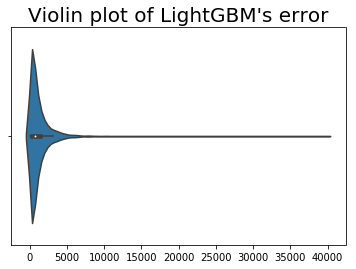

In [33]:
sns.violinplot(LB_error).set_title("Violin plot of LightGBM's error", size = 20)

Text(0.5,1,"Violin plot of XGBoost's error")

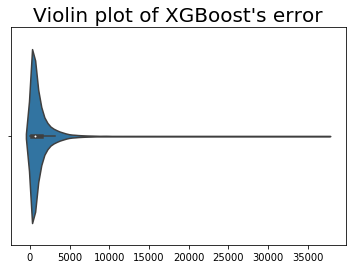

In [30]:
sns.violinplot(XG_error).set_title("Violin plot of XGBoost's error", size = 20)

Text(0.5,1,"Violin plot of CatBoost's error")

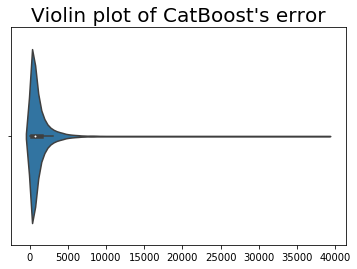

In [31]:
sns.violinplot(CB_error).set_title("Violin plot of CatBoost's error", size = 20)

In [19]:
np.max(XG_error)

37358.492578125006

In [20]:
np.max(LB_error)

39868.1328993034

In [21]:
np.max(CB_error)

38870.85507823451

In [22]:
np.min(XG_error)

0.04868164062509095

In [23]:
np.min(LB_error)

0.3502164849210203

In [24]:
np.min(CB_error)

0.3967019439529622

In [25]:
np.std(XG_error)

1573.550006194044

In [26]:
np.std(LB_error)

1570.1484556092155

In [27]:
np.std(CB_error)

1558.3605697315552

In [28]:
np.max(np.exp(y_test))

log_loss    49549.85
dtype: float64

In [44]:
normal_test = np.array(np.exp(y_test))

In [80]:
XG_smallest = []
XG_test = []


CB_smallest = []
CB_test = []

LB_smallest = []
LB_test = []


for i in range(len(y_test)):
    if XG_error[i] < CB_error[i] and XG_error[i] < LB_error[i]:
        XG_smallest.append(XG_error[i])
        XG_test.append(normal_test[i])
    if CB_error[i] < XG_error[i] and CB_error[i] < LB_error[i]:
        CB_smallest.append(CB_error[i])
        CB_test.append(normal_test[i])
    if LB_error[i] < XG_error[i] and LB_error[i] < CB_error[i]:
        LB_smallest.append(LB_error[i])
        LB_test.append(normal_test[i])
        
XG_smallest.remove(np.max(XG_smallest))
XG_test.remove(np.max(XG_test))

CB_smallest.remove(np.max(CB_smallest))
CB_test.remove(np.max(CB_test))

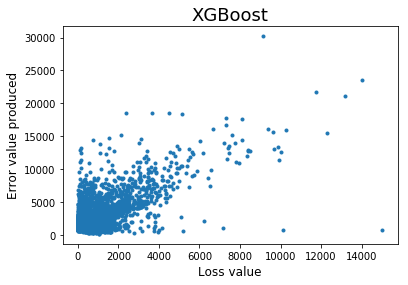

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(XG_smallest, XG_test, 'o', markersize = 3)
ax.set_title('XGBoost', size = 18)
ax.set_xlabel('Loss value',fontsize = 12)
ax.set_ylabel('Error value produced',fontsize = 12)
plt.show()

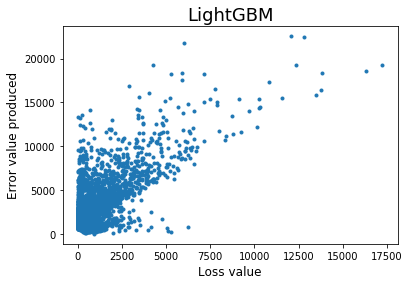

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(LB_smallest, LB_test, 'o', markersize = 3)
ax.set_title('LightGBM', size = 18)
ax.set_xlabel('Loss value',fontsize = 12)
ax.set_ylabel('Error value produced',fontsize = 12)
plt.show()

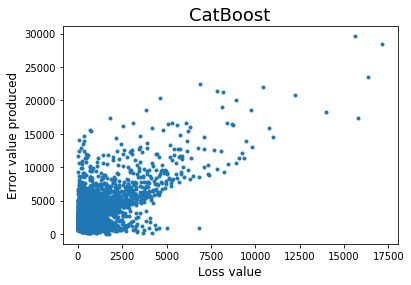

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(CB_smallest, CB_test, 'o', markersize = 3)
ax.set_title('CatBoost', size = 18)
ax.set_xlabel('Loss value',fontsize = 12)
ax.set_ylabel('Error value produced',fontsize = 12)
plt.show()